In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho
!unzip /content/vehicle-dataset-from-cardekho.zip

100% 292k/292k [00:00<00:00, 850kB/s]
100% 292k/292k [00:00<00:00, 849kB/s]
Archive:  /content/vehicle-dataset-from-cardekho.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            
  inflating: car details v4.csv      


# Part 1: Data preprocessing

## Importing the libraries and the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('/content/car data.csv')

In [23]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data explorating

In [24]:
data.shape

(301, 9)

In [25]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
data.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [28]:
data.select_dtypes(include=['float64', 'int64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [29]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with the missing values

In [30]:
data.isnull().values.any()

False

In [31]:
data.isnull().values.sum()

0

## Restructure the dataset

In [32]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
data = data.drop(columns='Car_Name')

In [34]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [35]:
data['Current_Year'] = 2023

In [36]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [37]:
data['Years_Old'] = data['Current_Year'] - data['Year']

In [38]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [39]:
data = data.drop(columns=['Current_Year', 'Year'])

In [40]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## Encoding the categorical data

In [41]:
data.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [42]:
data['Fuel_Type'].nunique()

3

In [43]:
data['Seller_Type'].nunique()

2

In [44]:
data['Transmission'].nunique()

2

In [45]:
data.shape

(301, 8)

In [46]:
data = pd.get_dummies(data=data, drop_first=True)

In [47]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [48]:
data.shape

(301, 9)

## Correlation matrix

In [49]:
data_2 = data.drop(columns='Selling_Price')

<Axes: title={'center': 'Correlated with Selling Price'}>

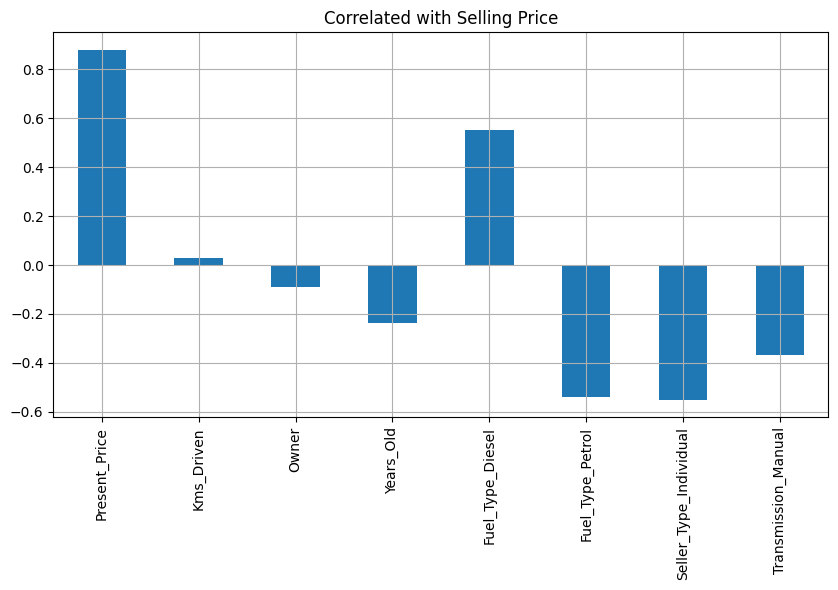

In [51]:
data_2.corrwith(data['Selling_Price']).plot.bar(
    figsize=(10,5), title='Correlated with Selling Price', grid=True
)

In [52]:
corr = data.corr()

<Axes: >

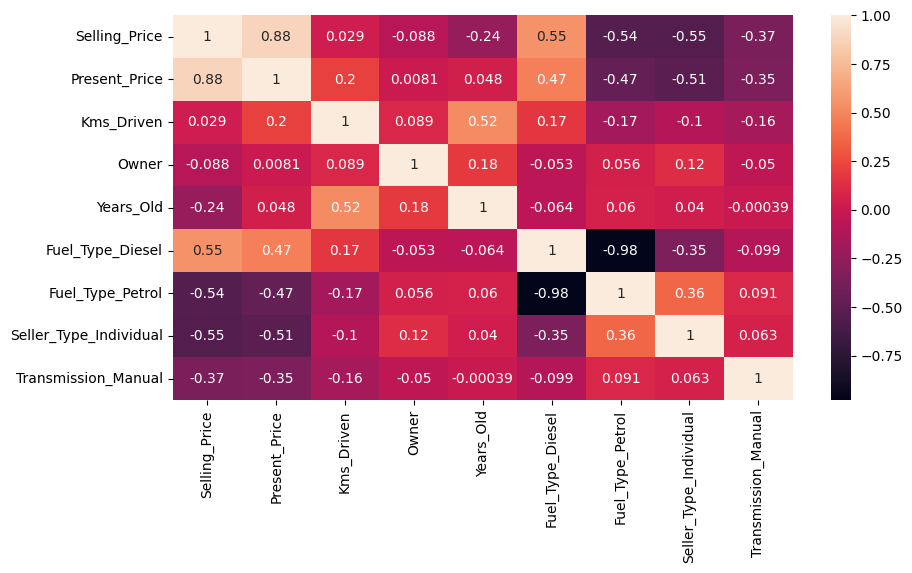

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [55]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [56]:
X = data.drop(columns='Selling_Price')

In [57]:
y = data['Selling_Price']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (240, 8)
y_train shape: (240,)
X_test shape: (61, 8)
y_test shape: (61,)


# Part 2: Build the model

## 1) Multiple linear regression

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)

In [67]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y_test, y_pred)

0.848981302489908

## 2) Random forest regression

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = rf.predict(X_test)

In [72]:
r2_score(y_test, y_pred)

0.9580245669313138

# Part 3: Find the optimal parameters using RandomizedSearchCV

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [82]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [83]:
random_cv = RandomizedSearchCV(estimator=rf, param_distributions=parameters,
                               n_iter=10, scoring='neg_mean_absolute_error',
                               cv=5, verbose=2, n_jobs=-1)

In [84]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [86]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=40, max_features='auto', n_estimators=500)

In [85]:
random_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40}

# Part 4: Final model (Random forest)

In [88]:
from sklearn.ensemble import RandomForestRegressor
final_rf = RandomForestRegressor(max_depth=40, max_features=1.0, n_estimators=500)
final_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=500)

In [90]:
y_pred = final_rf.predict(X_test)

In [91]:
r2_score(y_test, y_pred)

0.9586568899639443

# Part 5: Predicting a single observation

In [92]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [93]:
single_obs = [[8.50, 3500, 0, 5, 1, 0, 0, 1]]

In [94]:
final_rf.predict(single_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.211])